Use the HR dataset to answer this question. Suppose you are trying to figure out one or two main reasons why employees may be leaving this company. Analyze the dataset using appropriate SQL queries, and write an essay that reports your findings about why employees may be leaving. For full credit, you must identify at least two potential causes, and support each with numerical evidence and at least one SQL query. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
df = pd.read_csv("HR.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,position,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   position               14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Target variable is left

In [6]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [7]:
#Rearrange the columns

df = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',
         'Work_accident', 'promotion_last_5years', 'position', 'salary', 'left']]

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,position,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [9]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


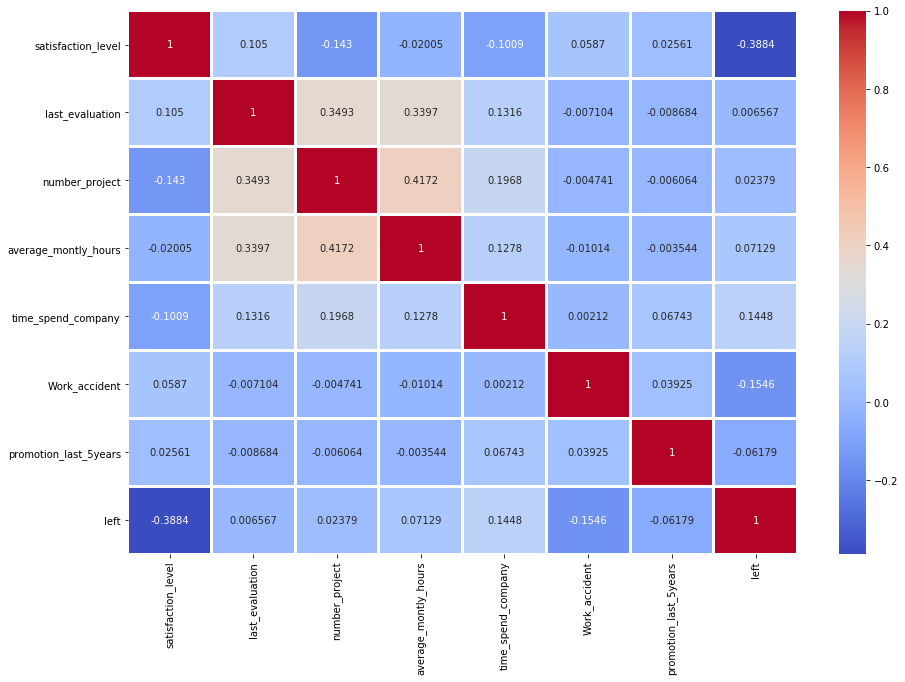

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True,fmt='.4g',linewidths=2)
plt.show()

### Only satisfaction level has negative correlation with left

### Create visualizations

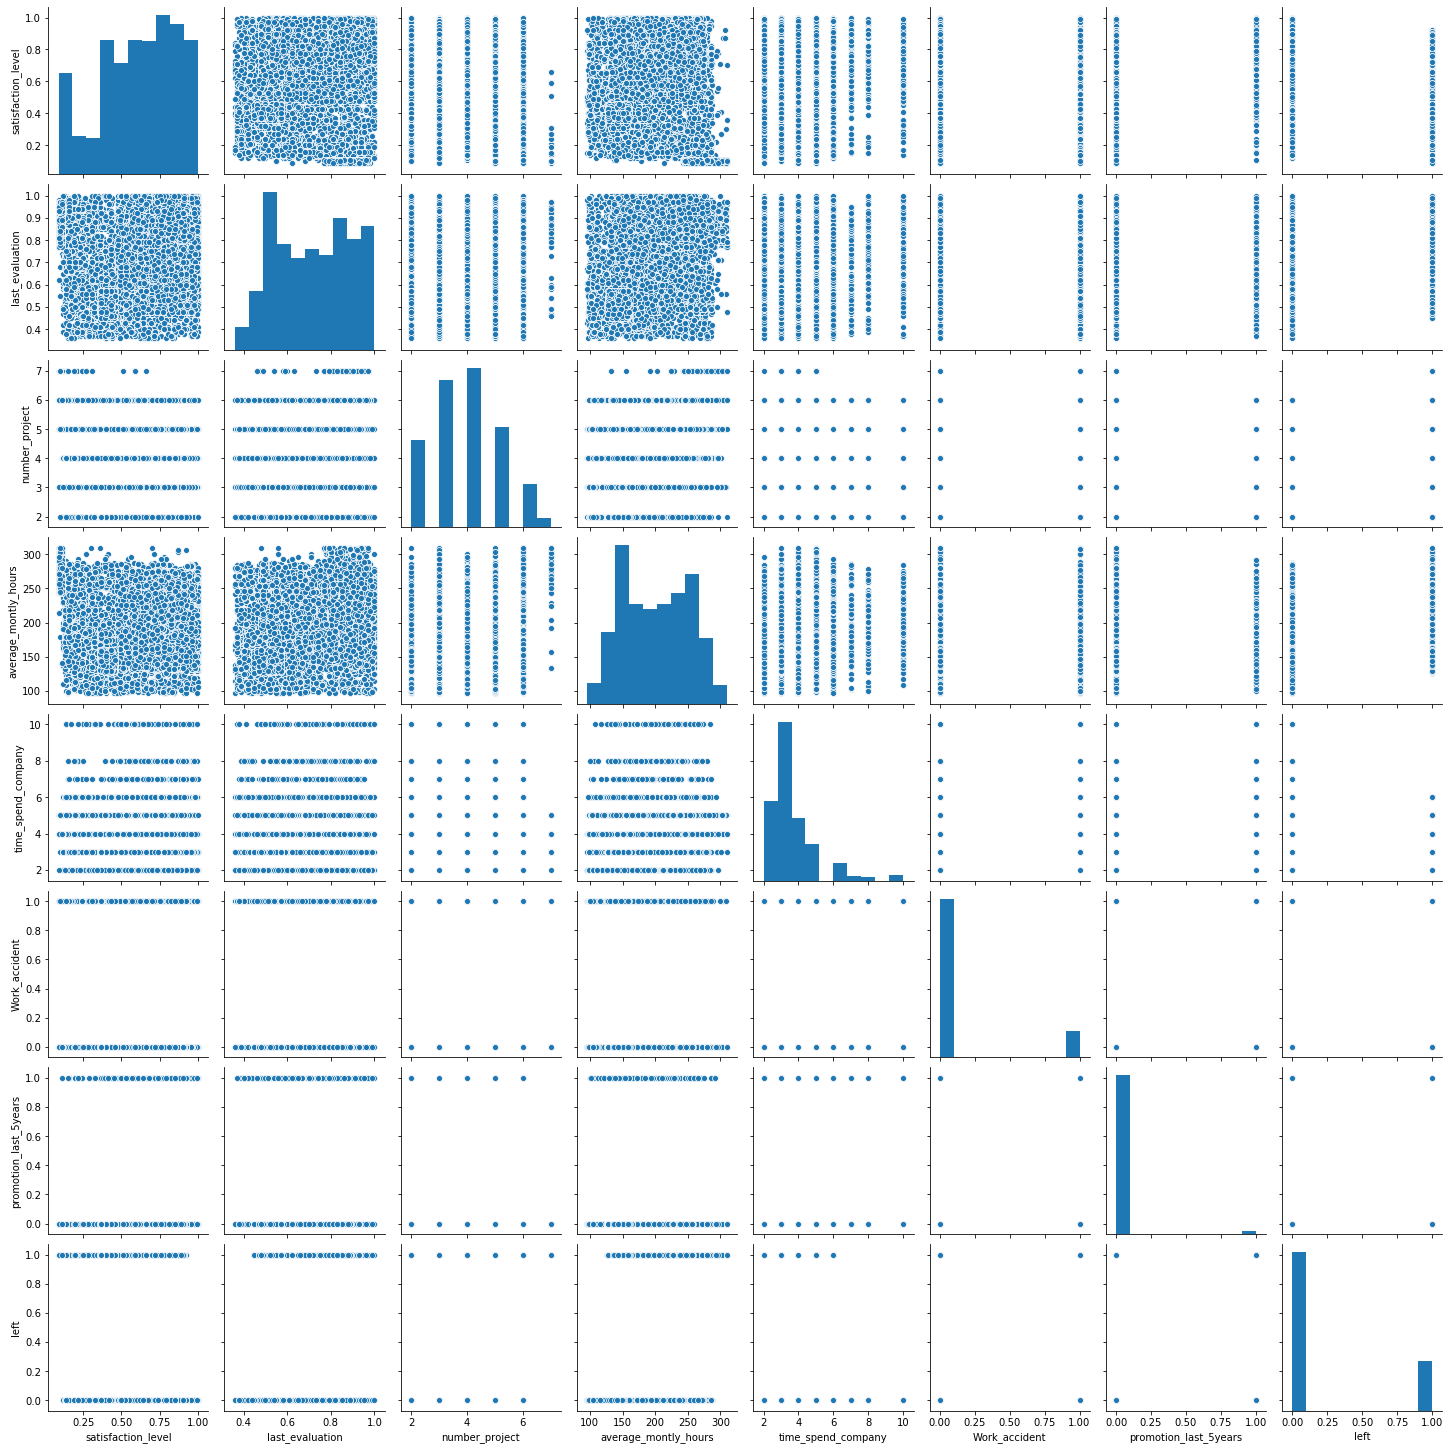

In [11]:
sns.pairplot(data=df)
plt.show()

### Lower satisfaction level for those who left

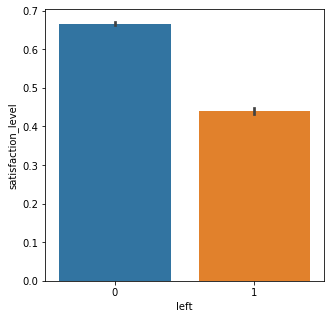

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(x=df.left,y=df.satisfaction_level)
plt.show()

### No discernable difference

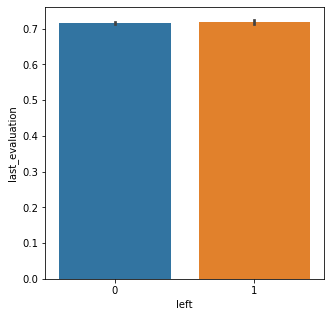

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x=df.left,y=df.last_evaluation)
plt.show()

### No of projects slightly higher for left

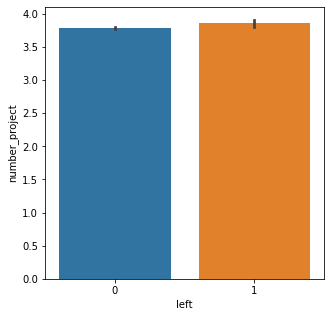

In [14]:
plt.figure(figsize=(5,5))
sns.barplot(x=df.left,y=df.number_project)
plt.show()

### Average monthly hours worked higher for left

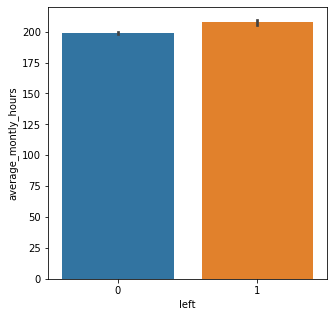

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x=df.left,y=df.average_montly_hours)
plt.show()

### Time spend with company ranges from 3 to 6 years of service for left

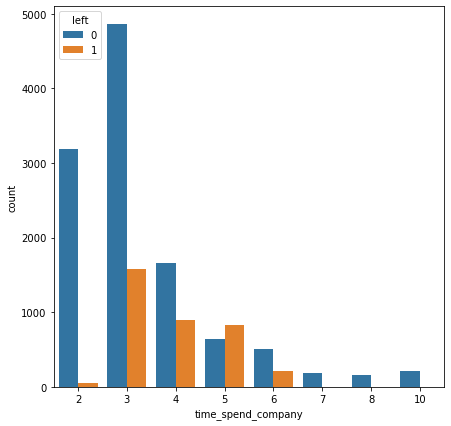

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(x=df.time_spend_company, hue=df.left)
plt.show()

### But work accidents are lesser for left

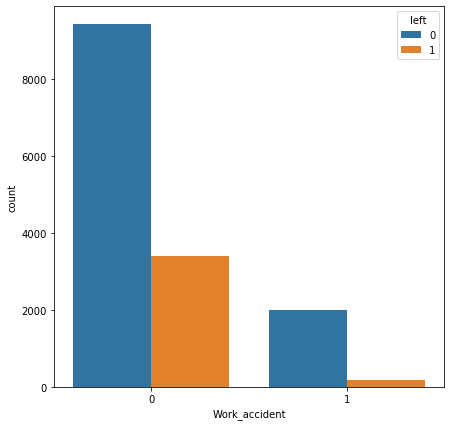

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(x=df.Work_accident,hue=df.left)
plt.show()

### Those who left are not promoted within 5 years of service

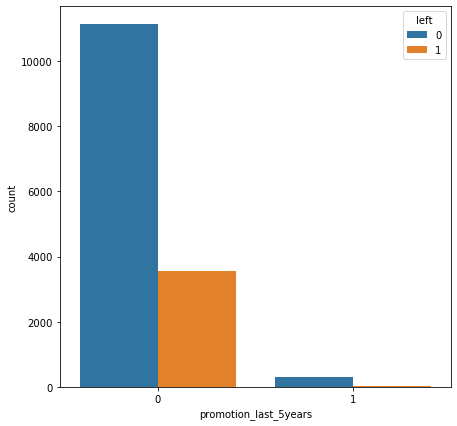

In [18]:
plt.figure(figsize=(7,7))
sns.countplot(x=df.promotion_last_5years,hue=df.left)
plt.show()

### Top 3 position categories for left are Sales, Technical and Support

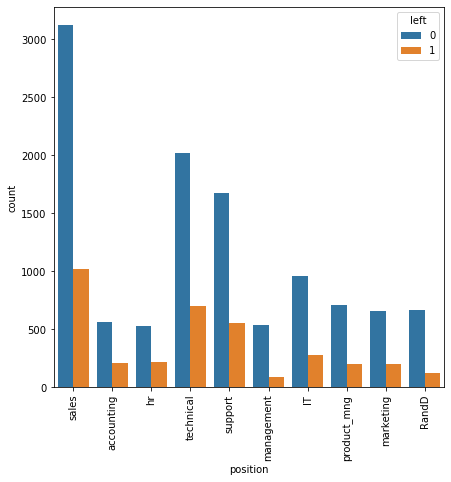

In [19]:
plt.figure(figsize=(7,7))
sns.countplot(x=df.position,hue=df.left)
plt.xticks(rotation=90)
plt.show()

### Low salary is a factor for left

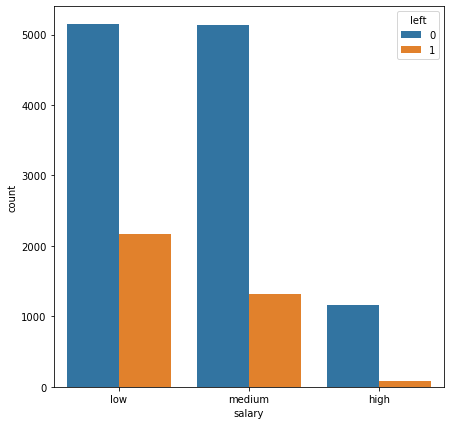

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(x=df.salary,hue=df.left)
plt.show()